In [1]:
import pvdeg
import matplotlib.pyplot as plt

## Implemented PVLIB temperature models in PVDEG 

In [3]:
scene_temp = pvdeg.scenario.Scenario(
    name= 'temperature and degredation',
    api_key='DEMO_KEY',
    email='user@mail.com',
)

scene_temp.addLocation(
    lat_long=(25.783388, -80.189029), 
    see_added=True,
)

scene_temp.addModule(
    module_name='sapm_1',
    temperature_model='sapm'
)

scene_temp.addModule(
    module_name='sapm_1',
    racking='open_rack_glass_polymer',
    material='EVA',
    temperature_model='sapm',
    irradiance_kwarg={'azimuth' : 120, 'tilt' : 30}, 
    model_kwarg={'irrad_ref' : 1100}, 
    see_added=True
)

scene_temp.addModule(
    module_name='pvsyst_1',
    racking='freestanding',
    material='EVA',
    temperature_model='pvsyst',
    irradiance_kwarg={'azimuth' : 180, 'tilt' : 0}, 
    model_kwarg={'module_efficiency' : 0.15}, 
    see_added=True
)
scene_temp.addModule(
    module_name='sapm_2',
    racking='open_rack_glass_polymer',
    material='EVA',
    temperature_model='sapm',
    irradiance_kwarg={'azimuth' : 120, 'tilt' : 30}, 
    model_kwarg={'irrad_ref' : 1000}, 
    see_added=True
)
scene_temp.addModule(
    module_name='sapm_3',
    racking='open_rack_glass_polymer',
    material='EVA',
    temperature_model='sapm',
    irradiance_kwarg={'azimuth' : 180, 'tilt' : 0}, 
    model_kwarg={'irrad_ref' : 1000}, 
    see_added=True
)

scene_temp.addModule(
    module_name='pvsyst_2',
    racking='freestanding',
    material='EVA',
    temperature_model='pvsyst',
    irradiance_kwarg={'azimuth' : 180, 'tilt' : 0}, 
    model_kwarg={'module_efficiency' : 0.2}, 
    see_added=True
)

scene_temp.addJob(
    func=pvdeg.temperature.temperature,
    func_params={'cell_or_mod' : 'cell'}, # check this and change
    see_added=True
)

scene_temp.addJob(
    # func=pvdeg.standards.standoff, # standoff only works with sapm, pvsyst breaks everything because of the configurations, default conf_inf of insulated_back_glass_polymer so if we try temp model = pysyst we will try to access an invalid configuration for that model
    func=pvdeg.degradation.vantHoff_deg,
    func_params={'I_chamber' : 1000, 'temp_chamber' : 25},
    see_added=True
)

scene_temp.addJob(
    # func=pvdeg.standards.standoff, # standoff only works with sapm, pvsyst breaks everything because of the configurations, default conf_inf of insulated_back_glass_polymer so if we try temp model = pysyst we will try to access an invalid configuration for that model
    func=pvdeg.degradation.vantHoff_deg,
    func_params={'I_chamber' : 1000, 'temp_chamber' : 30},
    see_added=True
)

scene_temp.addJob(
    func=pvdeg.degradation.IwaVantHoff,
    see_added=True
)

Column "relative_humidity" not found in DataFrame. Calculating...
WARNING - Module already found by name "sapm_1"
Module will be replaced with new instance.
Module "sapm_1" added.
Module "pvsyst_1" added.
Module "sapm_2" added.
Module "sapm_3" added.
Module "pvsyst_2" added.


C:\Users\tford\dev\PVDegradationTools\pvdeg\scenario.py:289: UserWarning: Gids Added - [1060699]
  warnings.warn(message, UserWarning)
C:\Users\tford\dev\PVDegradationTools\pvdeg\scenario.py:502: UserWarning: temperature added to pipeline as 
 {'job': <function temperature at 0x000001C2D45E8D30>, 'params': {'cell_or_mod': 'cell'}}
  warnings.warn(message, UserWarning)
C:\Users\tford\dev\PVDegradationTools\pvdeg\scenario.py:502: UserWarning: vantHoff_deg added to pipeline as 
 {'job': <function vantHoff_deg at 0x000001C2D5736680>, 'params': {'I_chamber': 1000, 'temp_chamber': 25}}
  warnings.warn(message, UserWarning)
C:\Users\tford\dev\PVDegradationTools\pvdeg\scenario.py:502: UserWarning: vantHoff_deg added to pipeline as 
 {'job': <function vantHoff_deg at 0x000001C2D5736680>, 'params': {'I_chamber': 1000, 'temp_chamber': 30}}
  warnings.warn(message, UserWarning)
C:\Users\tford\dev\PVDegradationTools\pvdeg\scenario.py:502: UserWarning: IwaVantHoff added to pipeline as 
 {'job': <fun

In [4]:
scene_temp.run()

In [11]:
scene_temp

,0
2005-01-01 00:30:00-05:00,22.000000
2005-01-01 01:30:00-05:00,21.000000
2005-01-01 02:30:00-05:00,21.000000
2005-01-01 03:30:00-05:00,21.000000
2005-01-01 04:30:00-05:00,21.000000
2005-01-01 05:30:00-05:00,21.000000
2005-01-01 06:30:00-05:00,21.000000
2005-01-01 07:30:00-05:00,22.035591
2005-01-01 08:30:00-05:00,28.016994
2005-01-01 09:30:00-05:00,32.514264


In [ ]:
scene_temp.clean()

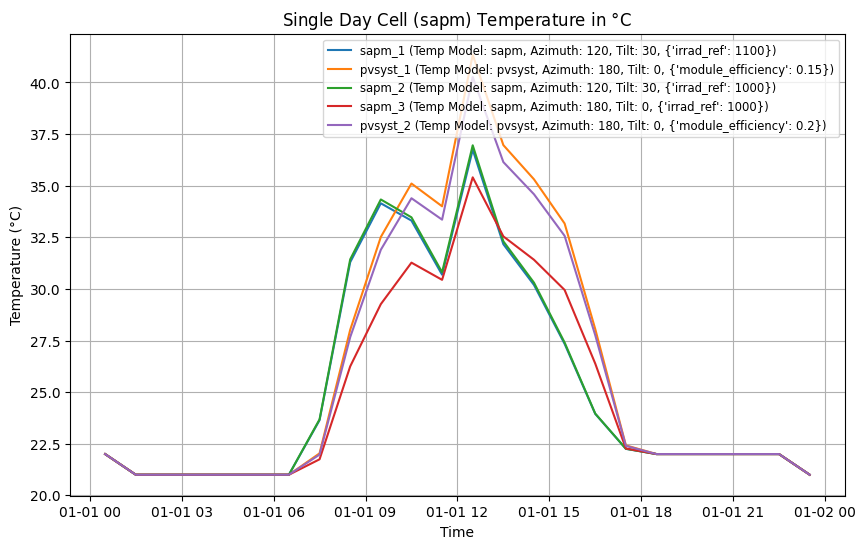

In [7]:
results = scene_temp.results

mod_1_temp = results['sapm_1']['temperature'][:24]
new_index = mod_1_temp.index.map(lambda dt: dt.replace(year=2000))

labels = [
    f"{mod['module_name']} (Temp Model: {mod['temp_model']}, Azimuth: {mod['irradiance_kwarg']['azimuth']}, Tilt: {mod['irradiance_kwarg']['tilt']}, {mod['model_kwarg']})"
    for mod in scene_temp.modules
]

plt.figure(figsize=(10, 6))
for i, mod in enumerate(scene_temp.modules):
    module_name = mod['module_name']
    if module_name in results:
        temp_data = results[module_name]['temperature'][:24]
        plt.plot(new_index, temp_data, label=labels[i])

# Set plot title and labels
plt.title('Single Day Cell (sapm) Temperature in $\degree$C')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend( fontsize='small')
plt.grid(True)
plt.show()